In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import spearmanr
import itertools

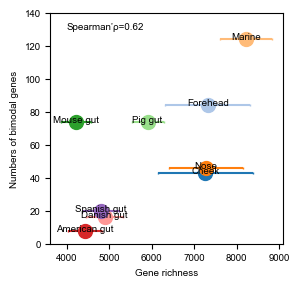

In [ ]:
communities_namelist1 = [ 'Human_cheek', 'Human_forehead', 'Human_nose', 'Marine', 'Mouse', 'Pig','American','Danish','Spanish']
communities_namelist2 = [ 'Human_cheek_BiDgenes', 'Human_forehead_BiDgenes', 'Human_nose_BiDgenes', 'Marine_BiDgenes', 'Mouse_BiDgenes', 'Pig_BiDgenes','American_BiDgenes','Danish_BiDgenes','Spanish_BiDgenes']
communities_namelist3 = ['Cheek', 'Forehead', 'Nose', 'Marine', 'Mouse gut', 'Pig gut', 'American gut', 'Danish gut', 'Spanish gut']

plt.figure(figsize=(3,3))
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 7

tab20 = plt.get_cmap('tab20')
color = itertools.cycle(tab20.colors)
colors = list(itertools.islice(color, 60))

number_of_genes_list = []
Gene_richness = []
for i in range(len(communities_namelist2)):
    samples = pd.read_csv('genes normalization/'+communities_namelist1[i],sep='\t',index_col=0)
    samples_numbers = []
    for j in range(len(samples.columns)):
        samples_numbers1 = len([x for x in samples.iloc[:,j] if x!=0])
        samples_numbers+=[samples_numbers1]
    samples_errorbar = np.std(samples_numbers, ddof=1)
    samples_mean = np.sum(samples_numbers)/len(samples_numbers)
    all_bimodalgenes = pd.read_csv('bimodal genes/'+communities_namelist2[i],sep='\t').iloc[:,0].tolist()

    Gene_richness.append(samples_mean)
    number_of_genes_list.append(len(all_bimodalgenes))
    
    plt.errorbar(samples_mean,len(all_bimodalgenes), xerr=samples_errorbar, fmt='.',markersize=20, color=colors[i],alpha=1,label=communities_namelist3[i],capsize=1)
    plt.text(samples_mean,len(all_bimodalgenes)-0.2, communities_namelist3[i], fontsize=7, ha='center', color='black')

#spearmanr
corr, p_value = spearmanr( Gene_richness,number_of_genes_list)

plt.xlabel("Gene richness", fontsize=7)  
plt.ylabel("Numbers of bimodal genes", fontsize=7)  
plt.ylim(0.0,140)
plt.text(4000,130,f'Spearman\u2019\u03C1={corr:.2f}',fontsize='7')
plt.savefig('fig/bimodalgenes and all genes in diffrent communities.pdf',bbox_inches='tight')
pd.DataFrame({'Gene richness':Gene_richness,'Numbers of bimodal genes':number_of_genes_list},index=communities_namelist3).to_csv('fig/bimodalgenes and all genes in diffrent communities.csv',index=True,sep=',')